In [18]:
import sys
sys.path.append('/Users/sstk4353/packages/.')

from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')


In [25]:
pol_list = ['H', 'V']
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'
HOVERFLY_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/hoverfly/'
HOVERFLY_2_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/hoverfly2/'

In [20]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

In [22]:
results_dict = {x : {p : None for p in pol_list} for x in ['Hoverfly_1_0250', 'Hoverfly_1_0400', 'Hoverfly_2_0400','Bernard']}

In [26]:
for pol in pol_list:

    path = HOVERFLY_2_DRIVE_PATH + f'hoverfly_test_p0_s0_{pol}_L2_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    
    output_path = HOVERFLY_2_DRIVE_PATH + f'hoverfly_test_p0_s0_{pol}_L2_dict.csv'
    df.to_csv(output_path)
    results_dict['Hoverfly_2_0400'][pol] = df 

    path = HOVERFLY_DRIVE_PATH + f'hoverfly_0400_p0_s0_{pol}_L12_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    
    output_path = HOVERFLY_DRIVE_PATH + f'hoverfly_0400_p0_s0_{pol}_L12_dict.csv'
    df.to_csv(output_path)
    results_dict['Hoverfly_1_0400'][pol] = df 

    path = HOVERFLY_DRIVE_PATH + f'hoverfly_permitivity_fixed_p0_s0_{pol}_L12_dict.pkl'
    conv = converter.from_pickle(path)
    df = conv.generate_output_df()
    
    output_path = HOVERFLY_DRIVE_PATH + f'hoverfly_permitivity_fixed_p0_s0_{pol}_L12_dict.csv'
    df.to_csv(output_path)
    results_dict['Hoverfly_1_0250'][pol] = df


    # results_dict['Hoverfly_0250'][pol] = pd.read_csv(HOVERFLY_DRIVE_PATH + f'hoverfly_permitivity_fixed_p0_s0_{pol}_L12_dict.pkl')
    results_dict['Bernard'][pol]  = pd.read_csv(f'/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/Bernard/parameterised/csv/size_analysis_056/Bernard_parameterised_560_{pol}_M_1000_body_p0_s0_df.csv')  


Text(0.5, 1.0, 'Variation of PhiDP across models at 5.6GHz')

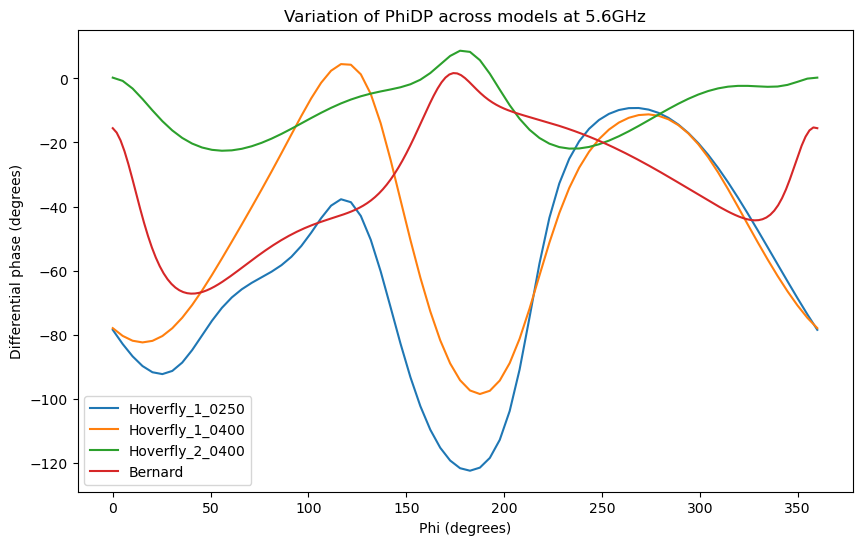

In [30]:
for model in ['Hoverfly_1_0250','Hoverfly_1_0400', 'Hoverfly_2_0400', 'Bernard']:
    dp = DualPol(results_dict[model]['H'], results_dict[model]['V'], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(results_dict[model]['H']['phi'], dp.differential_phase, label=model, linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP across models at 5.6GHz')

Text(0.5, 1.0, 'Variation of ZDR with size at 5.6GHz')

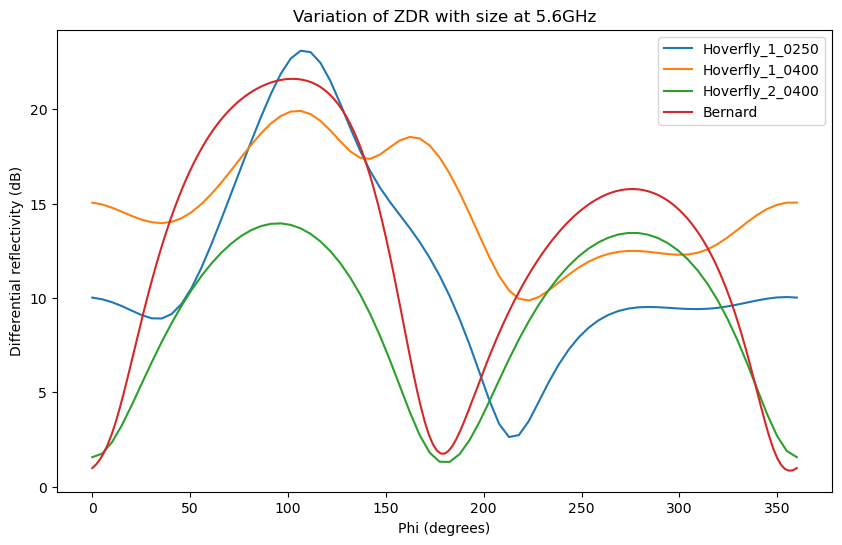

In [ ]:
for model in ['Hoverfly_1_0250','Hoverfly_1_0400', 'Hoverfly_2_0400', 'Bernard']:
    dp = DualPol(results_dict[model]['H'], results_dict[model]['V'], read_from_df=True)
    dp._calculate_differential_reflectivity()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(results_dict[model]['H']['phi'], dp.differential_reflectivity, label=model, linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential reflectivity (dB)')
plt.title(f'Variation of ZDR across models at 5.6GHz')

In [36]:
sizes = [2,8,10,12,14,16,30]
size_result_dict = {x : {s: {p : None for p in pol_list} for s in sizes} for x in ['Hoverfly_1_0400', 'Hoverfly_2_0400']}

In [44]:
for size in sizes:
    for pol in pol_list:

        # path = HOVERFLY_2_DRIVE_PATH + f'hoverfly_test_p0_s0_{pol}_L{size}_dict.pkl'
        path = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/Shared drives/Biodar_Comp_Files/Biodar_PC_migration/C/Users/NCAS/Documents/Tommy/Sketchfab_hoverfly/model_2/results/' + f'hoverfly_test_p0_s0_{pol}_L{size}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = HOVERFLY_2_DRIVE_PATH + f'hoverfly_test_p0_s0_{pol}_L{size}_dict.csv'
        df.to_csv(output_path)
        size_result_dict['Hoverfly_2_0400'][size][pol] = df 

        path = HOVERFLY_DRIVE_PATH + f'hoverfly_0400_p0_s0_{pol}_L{size}_dict.pkl'
        conv = converter.from_pickle(path)
        df = conv.generate_output_df()
        
        output_path = HOVERFLY_DRIVE_PATH + f'hoverfly_0400_p0_s0_{pol}_L{size}_dict.csv'
        df.to_csv(output_path)
        size_result_dict['Hoverfly_1_0400'][size][pol] = df 

Text(0.5, 1.0, 'Variation of PhiDP with size at 5.6GHz for Hoverfly 1')

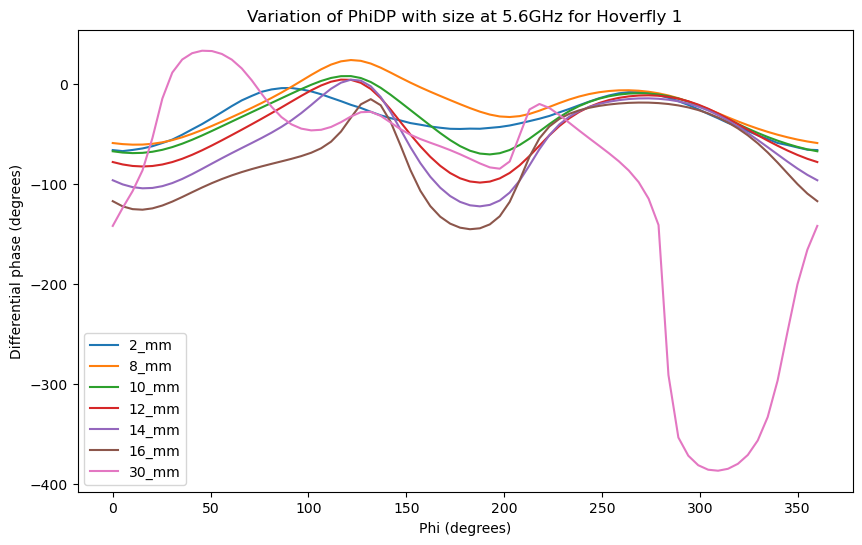

In [42]:
for size in sizes:
    dp = DualPol(size_result_dict['Hoverfly_1_0400'][size]['H'], size_result_dict['Hoverfly_1_0400'][size]['V'], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    if size ==30:
        plt.plot(size_result_dict['Hoverfly_1_0400'][size]['H']['phi'], dp._de_alias(dp.differential_phase), label=f'{size}_mm', linestyle = '-')
    else:
        plt.plot(size_result_dict['Hoverfly_1_0400'][size]['H']['phi'], dp.differential_phase, label=f'{size}_mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP with size at 5.6GHz for Hoverfly 1')

Text(0.5, 1.0, 'Variation of ZDR with size at 5.6GHz for Hoverfly 1')

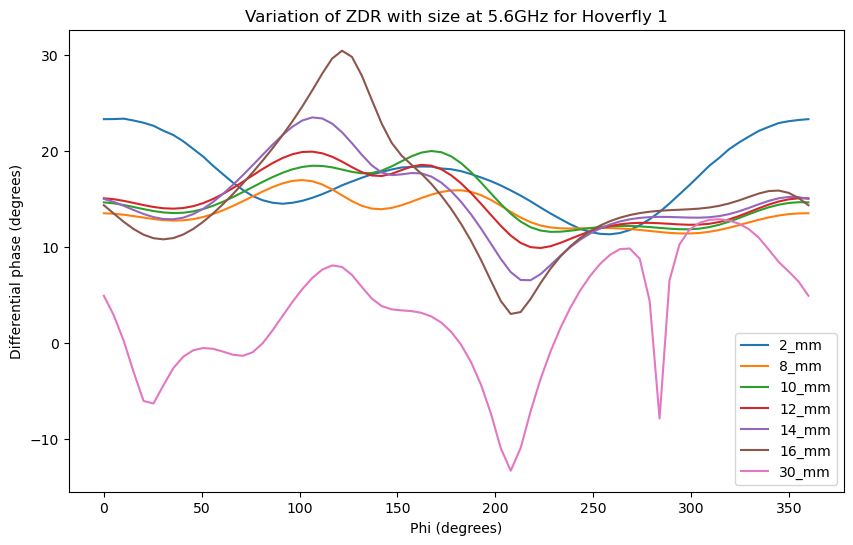

In [43]:
for size in sizes:
    dp = DualPol(size_result_dict['Hoverfly_1_0400'][size]['H'], size_result_dict['Hoverfly_1_0400'][size]['V'], read_from_df=True)
    dp._calculate_differential_reflectivity()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(size_result_dict['Hoverfly_1_0400'][size]['H']['phi'], dp.differential_reflectivity, label=f'{size}_mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of ZDR with size at 5.6GHz for Hoverfly 1')

Text(0.5, 1.0, 'Variation of PhiDP with size at 5.6GHz for Hoverfly 2')

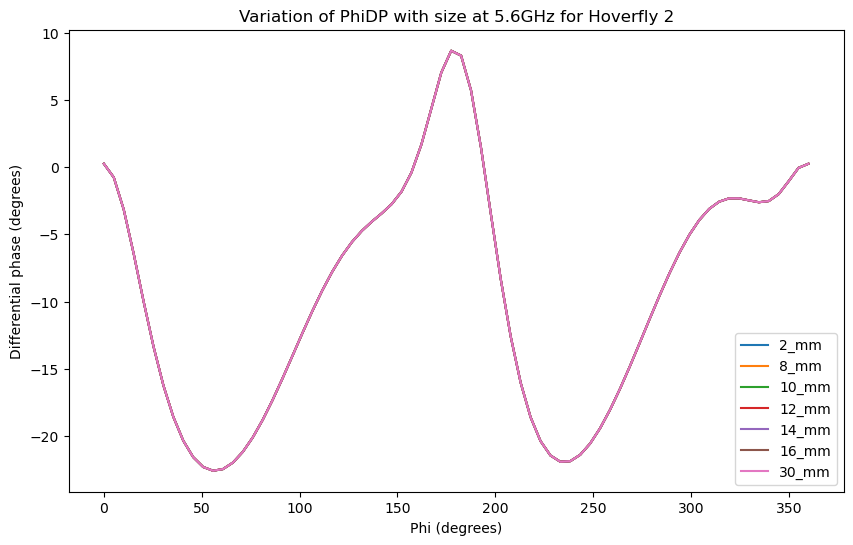

In [45]:
for size in sizes:
    dp = DualPol(size_result_dict['Hoverfly_2_0400'][size]['H'], size_result_dict['Hoverfly_2_0400'][size]['V'], read_from_df=True)
    dp._calculate_differential_phase()

    #Zdr_full = 10*np.log10(power_bernard_full/power_ellipsoid)
    
    plt.plot(size_result_dict['Hoverfly_2_0400'][size]['H']['phi'], dp.differential_phase, label=f'{size}_mm', linestyle = '-')


fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.legend()
plt.xlabel('Phi (degrees)')
plt.ylabel('Differential phase (degrees)')
plt.title(f'Variation of PhiDP with size at 5.6GHz for Hoverfly 2')